<a href="https://colab.research.google.com/github/Sanyam8055/100-Days-of-ML/blob/master/ML_L1_Assignment_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve 

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)


In [252]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [0]:
y = attrition_data['Attrition']
X = attrition_data.drop(['Attrition'], axis = 1)

In [254]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026


In [0]:
X=X.apply(LabelEncoder().fit_transform)

In [256]:
print(attrition_data.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [257]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,23,2,498,2,0,1,1,0,0,1,0,64,2,1,7,3,2,573,717,8,1,0,0,0,0,8,0,0,6,4,0,5,0
1,31,1,88,1,7,0,1,0,1,2,1,31,1,1,6,1,1,494,951,1,0,12,1,3,1,10,3,2,10,7,1,7,1
2,19,2,649,1,1,1,4,0,2,3,1,62,1,0,2,2,2,45,16,6,1,4,0,1,0,7,3,2,0,0,0,0,2
3,15,1,660,1,2,3,1,0,3,3,0,26,2,0,6,2,1,231,878,1,1,0,0,2,0,8,3,2,8,7,3,0,3
4,9,2,243,1,1,0,3,0,4,0,1,10,2,0,2,1,1,292,603,9,0,1,0,3,1,6,3,2,2,2,2,2,4


# **Random Forest Classifier**

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)
 
rfc = RandomForestClassifier(n_estimators=1,
                            random_state=1111,
                            max_features=32)

rfc.fit(X_train, y_train)

print('The training error is {0:.3f}'.format(mean_absolute_error(y_train, rfc.predict(X_train))))
print('The testing error is {0:.3f}'.format(mean_absolute_error(y_test, rfc.predict(X_test))))

The training error is 0.096
The testing error is 0.226


In [259]:
predictions = rfc.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

90.4 %


In [260]:
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

77.43 %


In [261]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[178  32]
 [ 26  21]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       210
           1       0.40      0.45      0.42        47

    accuracy                           0.77       257
   macro avg       0.63      0.65      0.64       257
weighted avg       0.79      0.77      0.78       257



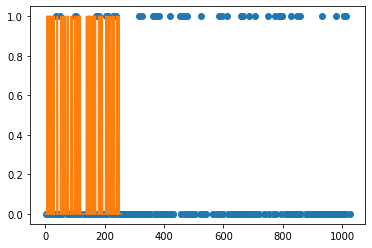

In [262]:
 plt.plot(y_test, 'o')
 plt.plot(rfr.predict(X_test))

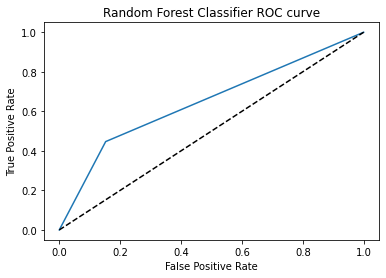

In [263]:
 
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC curve')
plt.show()

# **Extreme Gradient Boosting** 

In [264]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [265]:
predictions = xgb_clf.predict(X_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

88.2 %


In [266]:
predictions = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

83.66 %


In [267]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[206   4]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       210
           1       0.69      0.19      0.30        47

    accuracy                           0.84       257
   macro avg       0.77      0.59      0.60       257
weighted avg       0.82      0.84      0.80       257



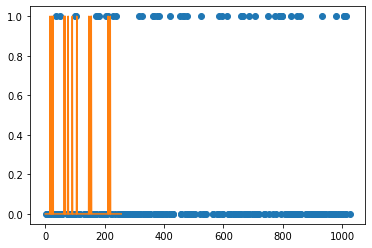

In [268]:
plt.plot(y_test, 'o')
plt.plot(xgb_clf.predict(X_test))

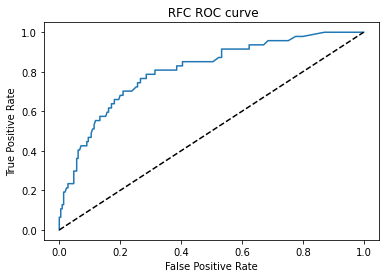

In [269]:
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' RFC ROC curve')
plt.show()

# **Gradient Boosting Classifier**

In [270]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [271]:
predictions = clf.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

90.27 %


In [272]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

85.99 %


In [273]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[208   2]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       210
           1       0.87      0.28      0.42        47

    accuracy                           0.86       257
   macro avg       0.86      0.63      0.67       257
weighted avg       0.86      0.86      0.83       257



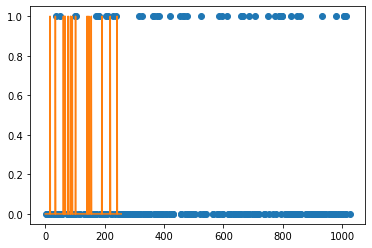

In [274]:
plt.plot(y_test, 'o')
plt.plot(clf.predict(X_test))

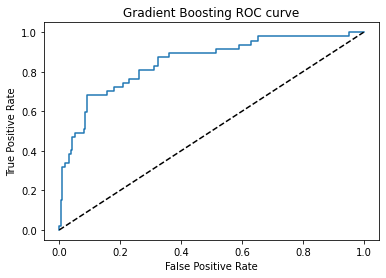

In [275]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC curve')
plt.show()